## Superconducting circuit

In [111]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scienceplots # to save a nice plot
from itertools import combinations
plt.style.use(['science', 'notebook', 'grid'])

# The historical evidence showing superconductivity

The original figure showing that mercury 
loses its resistivity at a temperature just 
below 4.2 K was published by H. K. ONNES

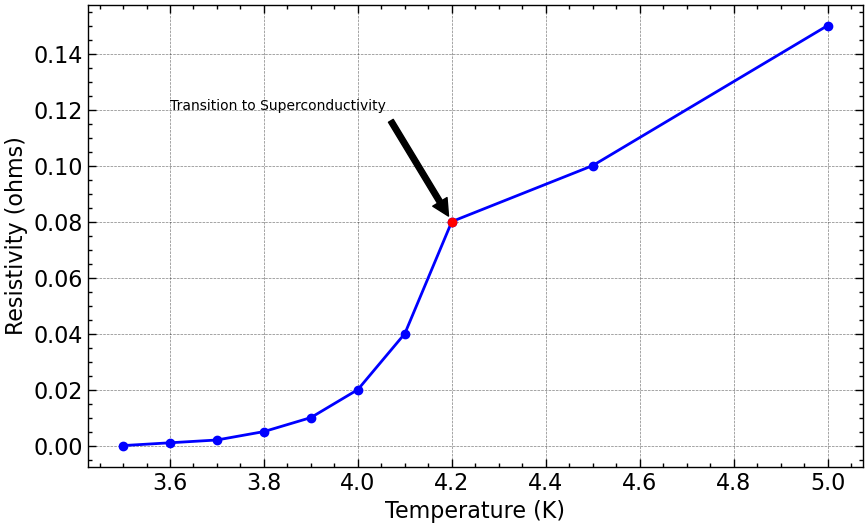

In [112]:
# Data points based on H. K. Onnes's original experiment
temperature = np.array([5.0, 4.5, 4.2, 4.1, 4.0, 3.9, 3.8, 3.7, 3.6, 3.5])
resistivity = np.array([0.15, 0.10, 0.08, 0.04, 0.02, 0.01, 0.005, 0.002, 0.001, 0.0])

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(temperature, resistivity, marker='o', linestyle='-', color='b')

# Adding titles and labels
plt.xlabel('Temperature (K)')
plt.ylabel('Resistivity (ohms)')

# Annotating the transition point
plt.annotate('Transition to Superconductivity', xy=(4.2, 0.08), xytext=(3.6, 0.12),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.plot(4.2, 0.08, 'ro')

# Display the plot
plt.grid(True)
save_file_1 = 'C:\\Users\\admin\\Desktop\\GitHub\\superconducting_circuit\\course\\part\\intro\\Mercury_superconducting_transition.pdf'
plt.savefig(save_file_1, format='pdf')
plt.show()


# Theory of this plot

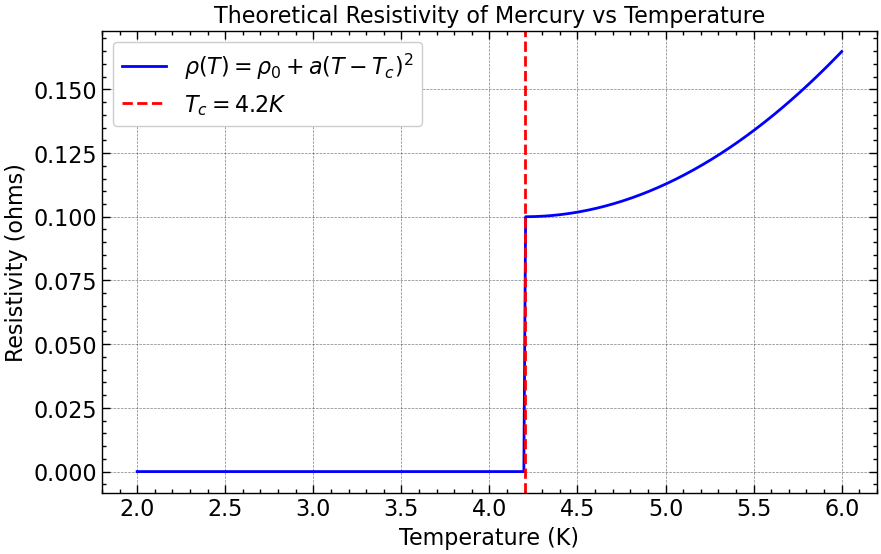

In [113]:
# Parameters
T_c = 4.2  # Critical temperature
T = np.linspace(2, 6, 400)  # Temperature range
rho_0 = 0.1  # Residual resistivity
a = 0.02  # Coefficient for normal state resistivity

# Resistivity calculation
rho = np.piecewise(T, [T < T_c, T >= T_c],
                   [lambda T: 0, lambda T: rho_0 + a * (T - T_c)**2])

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(T, rho, color='b', label=r'$\rho (T) = \rho_0 + a (T - T_c)^2$')

# Adding titles and labels
plt.title('Theoretical Resistivity of Mercury vs Temperature')
plt.xlabel('Temperature (K)')
plt.ylabel('Resistivity (ohms)')

# Annotating the transition point

# Annotating the transition point
plt.axvline(x=T_c, color='r', linestyle='--', label=rf'$T_c = {T_c} K$')
plt.legend()



# Display the plot
plt.grid(True)
plt.show()


# Hamiltonian 

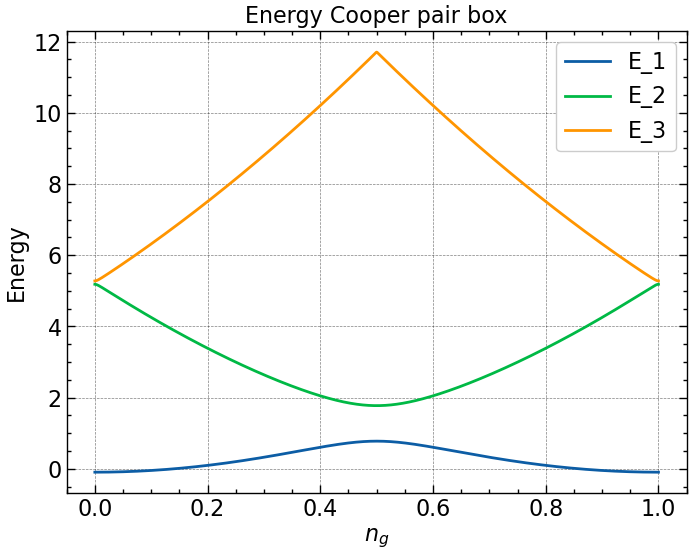

In [115]:
n_max = 10
dim = 2*n_max + 1
E_J = 1
E_C = 1.3
n_g = np.linspace(0, 1, 1000)

# Identity matrix
id = np.eye(dim)

# Charge number operator

N = np.zeros((dim,dim))
for j in range (dim):
   N[j,j] = -n_max + j

C = np.zeros((dim, dim))
for i in range(dim - 1):
    C[i, i + 1] = 1
    C[i + 1, i] = 1

# Storage for energies
energy_1 = []
energy_2 = []
energy_3 = []

for n in n_g:
    prim = N - n * id
    H = 4 * E_C * (prim @ prim) - (E_J / 2) * C
    E = np.sort(np.linalg.eig(H)[0]) 
    energy_1.append(E[0])
    energy_2.append(E[1])
    energy_3.append(E[2])

# Plotting
plt.plot(n_g, energy_1, label="E_1")
plt.plot(n_g, energy_2, label="E_2")
plt.plot(n_g, energy_3, label="E_3")
plt.xlabel('$n_g$')
plt.ylabel('Energy')
plt.title('Energy Cooper pair box')
plt.legend()
plt.grid(True)
plt.show()
